# Image Classification with Keras

This notebook demonstrates how to build and train a Convolutional Neural Network (CNN) for image classification using the CIFAR-10 dataset. The project includes data preprocessing, model training, evaluation, and testing on custom images.

## Project Overview
- **Dataset**: CIFAR-10 (10 classes of 32x32 color images)
- **Model**: Convolutional Neural Network with multiple layers
- **Goal**: Classify images into 10 categories and test on custom images
- **Framework**: TensorFlow/Keras

## 1. Install Required Libraries

First install the essential libraries for deep learning and image processing. TensorFlow provides the neural network framework, NumPy handles numerical operations, and Matplotlib helps with data visualization.

In [46]:
!pip install tensorflow numpy matplotlib -q

## 2. Import Libraries

Importing the necessary libraries for building our image classification model. These include TensorFlow/Keras for deep learning, NumPy for numerical operations, and Matplotlib for visualization.

In [33]:
import tensorflow as tf
from tensorflow.keras import layers, models
import matplotlib.pyplot as plt
import numpy as np

## 3. Load the CIFAR-10 Dataset

Load the CIFAR-10 dataset, which contains 60,000 32x32 color images in 10 classes. The dataset is automatically split into 50,000 training images and 10,000 test images.

In [34]:
# Load dataset
(x_train, y_train), (x_test, y_test) = tf.keras.datasets.cifar10.load_data()

## 4. Normalize the Data

Normalize pixel values from the range 0-255 to 0-1. This helps the neural network train more effectively by ensuring all input values are on a similar scale.

In [35]:
# Normalize pixel values (0–255 → 0–1)
x_train, x_test = x_train / 255.0, x_test / 255.0


In [36]:
# Show some samples
class_names = ['airplane', 'car', 'bird', 'cat', 'deer', 
               'dog', 'frog', 'horse', 'ship', 'truck']

## 5. Define Class Names and Visualize Sample Data

Set up the class names for the 10 categories in CIFAR-10 and display some sample images to understand our dataset better.

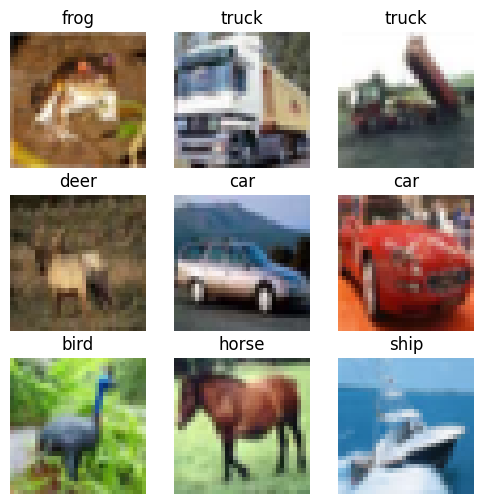

In [37]:
plt.figure(figsize=(6,6))
for i in range(9):
    plt.subplot(3,3,i+1)
    plt.imshow(x_train[i])
    plt.title(class_names[y_train[i][0]])
    plt.axis('off')
plt.show()

## 6. Build the Convolutional Neural Network (CNN)

Create a CNN architecture with multiple convolutional layers, pooling layers, and dense layers. This model will learn to recognize patterns in the images and classify them into the 10 categories.

In [38]:
# Build a Simple CNN (Convolutional Neural Network)
model = models.Sequential([
    layers.Conv2D(32, (3,3), activation='relu', input_shape=(32,32,3)),
    layers.MaxPooling2D((2,2)),
    
    layers.Conv2D(64, (3,3), activation='relu'),
    layers.MaxPooling2D((2,2)),
    
    layers.Conv2D(64, (3,3), activation='relu'),
    layers.Flatten(),
    
    layers.Dense(64, activation='relu'),
    layers.Dense(10)  # 10 output classes
])

/Users/skhan724@cable.comcast.com/Library/CloudStorage/OneDrive-Comcast/Drexel-PASML-HH2WRXV06H/INFO-629-686 - FALL-25-26/A3/.venv/lib/python3.9/site-packages/keras/src/layers/convolutional/base_conv.py:113: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


## 7. Compile the Model

Configure the model for training by specifying the optimizer, loss function, and metrics to track during training.

In [39]:
model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

## 8. Train the Model

Train the CNN on the CIFAR-10 dataset for 20 epochs. The model will learn to recognize patterns and features in the images during this process.

In [40]:
history = model.fit(x_train, y_train, epochs=20, 
                    validation_data=(x_test, y_test))

Epoch 1/20
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 9s 5ms/step - accuracy: 0.3517 - loss: 1.7458 - val_accuracy: 0.5539 - val_loss: 1.2518
Epoch 2/20
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 9s 6ms/step - accuracy: 0.5709 - loss: 1.2019 - val_accuracy: 0.5994 - val_loss: 1.1231
Epoch 3/20
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 9s 6ms/step - accuracy: 0.6327 - loss: 1.0433 - val_accuracy: 0.6407 - val_loss: 1.0252
Epoch 4/20
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 9s 6ms/step - accuracy: 0.6647 - loss: 0.9496 - val_accuracy: 0.6509 - val_loss: 0.9910
Epoch 5/20
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 9s 6ms/step - accuracy: 0.7003 - loss: 0.8631 - val_accuracy: 0.6725 - val_loss: 0.9507
Epoch 6/20
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 9s 6ms/step - accuracy: 0.7180 - loss: 0.8062 - val_accuracy: 0.6776 - val_loss: 0.9276
Epoch 7/20
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 8s 5ms/step - accuracy: 0.7296 - loss: 0.7633 - val_accuracy: 0.6928 - val_loss: 0.8931
Epoch 8/20
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 9s 6ms/step - accuracy: 0.7506 - loss: 0.7109 - 

## 9. Evaluate Model Performance

Test the trained model on the test dataset to see how well it performs on unseen data. This gives us the final accuracy of our model.

In [41]:
test_loss, test_acc = model.evaluate(x_test, y_test, verbose=2)
print('\nTest accuracy:', test_acc)

313/313 - 1s - 2ms/step - accuracy: 0.6878 - loss: 1.1676

Test accuracy: 0.6877999901771545


## 10. Test with Predictions and Visualize Results

Create a probability model and test it on a sample from the test set to see how well our trained model performs on individual images.

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step
Predicted: deer


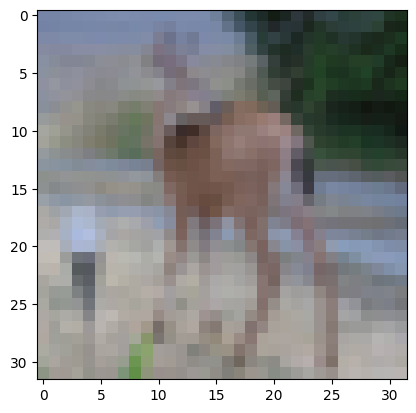

In [42]:
prob_model = tf.keras.Sequential([model, tf.keras.layers.Softmax()])
predictions = prob_model.predict(x_test)

print("Predicted:", class_names[np.argmax(predictions[100])])
plt.imshow(x_test[100])
plt.show()

## 11. Custom Image Prediction Functions

These functions allow us to load and preprocess custom images, then make predictions using our trained model. The functions handle image resizing, normalization, and display both the original and processed images with prediction results.

In [43]:
# Function to load and preprocess custom images
from PIL import Image
import os

def load_and_preprocess_image(image_path):
    """
    Load an image from file path and preprocess it for CIFAR-10 model prediction
    """
    # Load image
    img = Image.open(image_path)
    
    # Convert to RGB if needed (in case of RGBA or grayscale)
    if img.mode != 'RGB':
        img = img.convert('RGB')
    
    # Resize to 32x32 (CIFAR-10 input size)
    img = img.resize((32, 32))
    
    # Convert to numpy array
    img_array = np.array(img)
    
    # Normalize pixel values (0-255 to 0-1)
    img_array = img_array / 255.0
    
    # Add batch dimension
    img_array = np.expand_dims(img_array, axis=0)
    
    return img_array

def predict_custom_image(image_path, prob_model, class_names):
    """
    Predict the class of a custom image
    """
    # Preprocess the image
    processed_img = load_and_preprocess_image(image_path)
    
    # Make prediction
    predictions = prob_model.predict(processed_img)
    predicted_class_idx = np.argmax(predictions[0])
    predicted_class = class_names[predicted_class_idx]
    confidence = predictions[0][predicted_class_idx]
    
    # Display results
    plt.figure(figsize=(8, 4))
    
    # Show original image
    plt.subplot(1, 2, 1)
    original_img = Image.open(image_path)
    plt.imshow(original_img)
    plt.title('Original Image')
    plt.axis('off')
    
    # Show resized image (what the model sees)
    plt.subplot(1, 2, 2)
    resized_img = processed_img[0]
    plt.imshow(resized_img)
    plt.title(f'Resized (32x32)\nPredicted: {predicted_class}\nConfidence: {confidence:.2%}')
    plt.axis('off')
    
    plt.tight_layout()
    plt.show()
    
    return predicted_class, confidence

## 12. Test Model on Custom Images

Test the trained model on a custom image from the test_images directory. The model will predict the class and show confidence level along with both the original and resized versions of the image.

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step


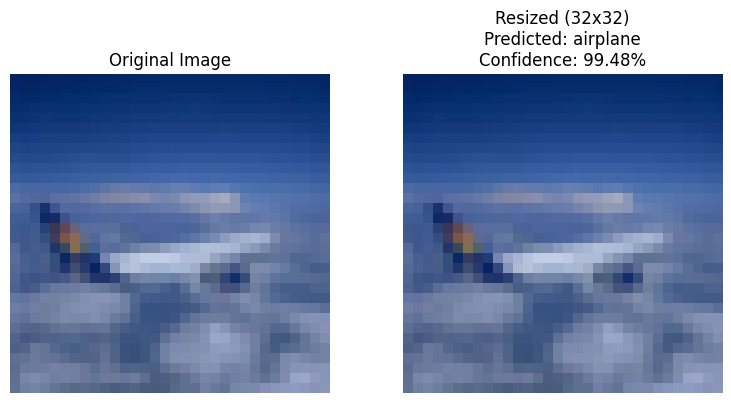


Final Prediction: airplane (Confidence: 99.48%)
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step


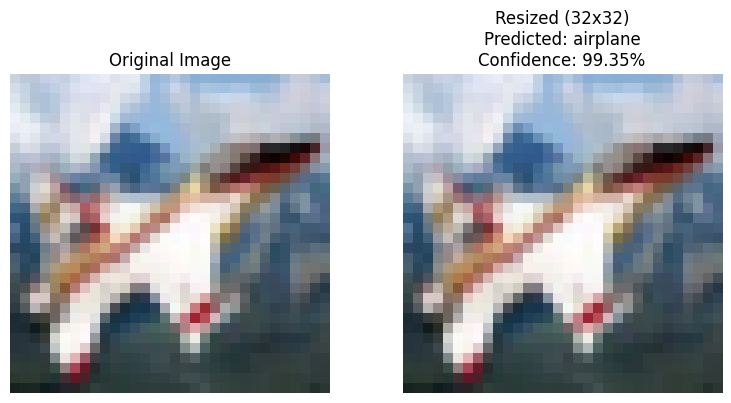


Final Prediction: airplane (Confidence: 99.35%)
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step


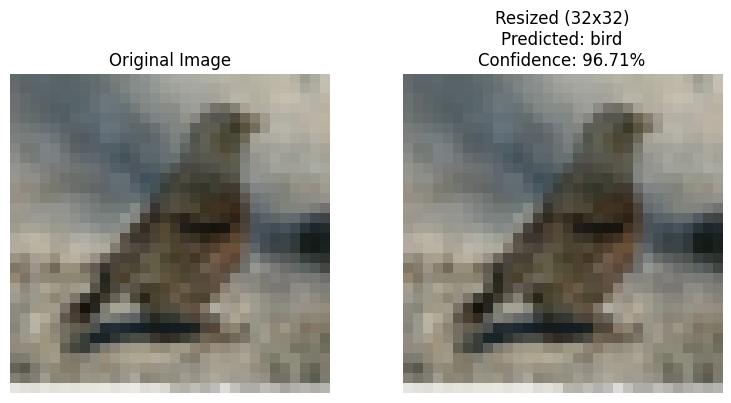


Final Prediction: bird (Confidence: 96.71%)
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step


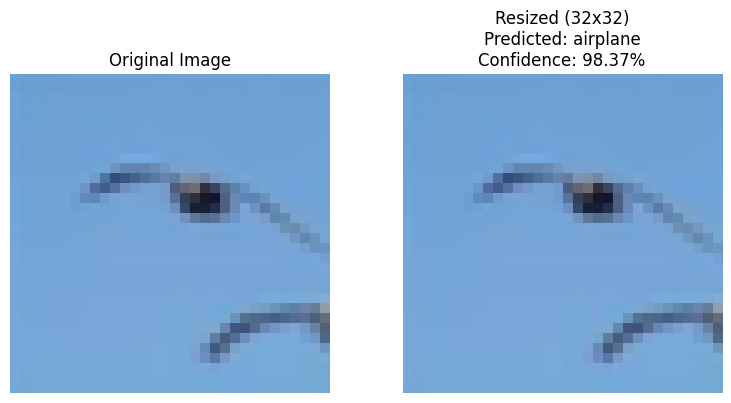


Final Prediction: airplane (Confidence: 98.37%)
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step


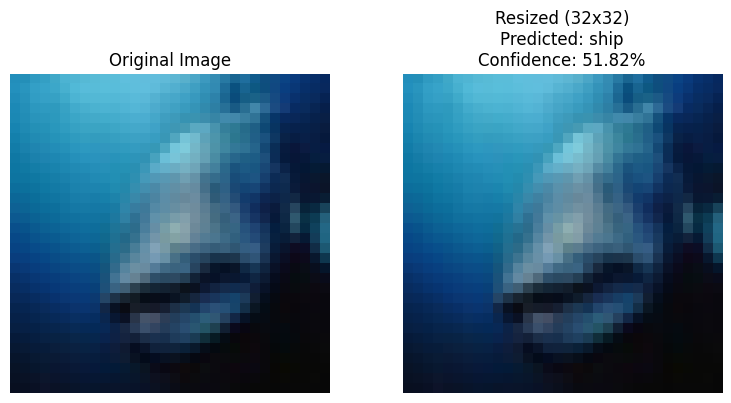


Final Prediction: ship (Confidence: 51.82%)
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step


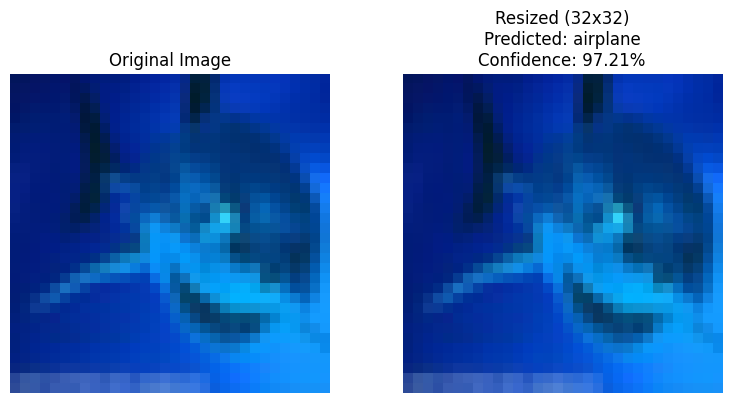


Final Prediction: airplane (Confidence: 97.21%)


In [45]:
# image_path = "sh1.png"  # Replace with your actual image path
images = ["./test_images/airplane1.png",
          "./test_images/airplane2.png",
          "./test_images/bird1.png",
          "./test_images/bird2.png",
          "./test_images/sh1.png",
          "./test_images/sh2.png"]
# image_path = "./test_images/bird2.png"  # Replace with your actual image path
for image_path in images:
    predicted_class, confidence = predict_custom_image(image_path, prob_model, class_names)
    print(f"\nFinal Prediction: {predicted_class} (Confidence: {confidence:.2%})")